## IRIS Dataset 활용 분류

In [1]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

### [1] 데이터 로딩 및 확인

In [2]:
data, target = load_iris(as_frame=True, return_X_y=True)

type(data), type(target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [3]:
print(data.info(), data.head(3), sep='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


In [4]:
print(target.head(3), target.unique(), target.value_counts(), sep='\n\n')

0    0
1    0
2    0
Name: target, dtype: int32

[0 1 2]

0    50
1    50
2    50
Name: target, dtype: int64


### [2] 학습 데이터 준비

In [5]:
# 데이터 => petal_length, petal_width
# 타  겟 => 0, 2

data=data.loc[:, data.columns[2:]]

print('data =>', data.shape)
data.head()

data => (150, 2)


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
# data=data.drop(range(100,150))
# target=target.drop(range(100,150))

In [7]:
# 학습용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

# train:test = 75:25 기본
# test_size=비율(0.5...등)
# stratify => 분류 항목 비율 맞추어서 데이터셋 설정
# random_state => 매번 동일하게 데이터 구성하는 경우 지정
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42)

In [8]:
# 모델 객체 생성
model = LogisticRegression(multi_class='multinomial')

In [9]:
# 훈련
model.fit(train_input, train_target)

LogisticRegression(multi_class='multinomial')

In [10]:
print('w:', model.coef_, 'b:', model.intercept_)

w: [[-2.59489149 -1.09019953]
 [ 0.07420011 -0.74788769]
 [ 2.52069138  1.83808723]] b: [ 10.39256308   2.91354993 -13.30611302]


In [11]:
model.score(test_input, test_target)

1.0

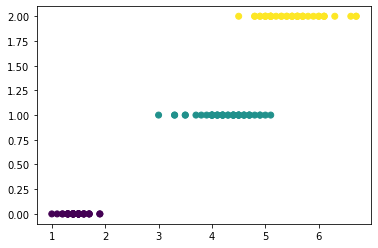

In [25]:
plt.scatter(train_input['petal length (cm)'], train_target, c=train_target)
plt.show()

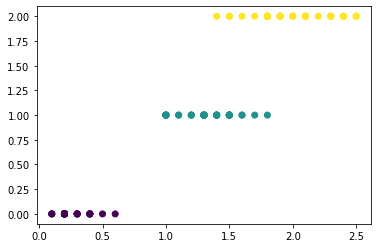

In [27]:
plt.scatter(train_input['petal width (cm)'], train_target, c=train_target)
plt.show()

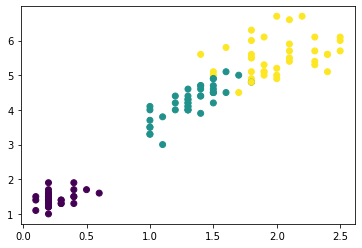

In [28]:
plt.scatter(train_input['petal width (cm)'], train_input['petal length (cm)'], c=train_target)
plt.show()

In [13]:
train_input['petal length (cm)'] #petal width (cm)

22     1.0
15     1.5
65     4.4
11     1.6
42     1.3
      ... 
71     4.0
106    4.5
14     1.2
92     4.0
102    5.9
Name: petal length (cm), Length: 120, dtype: float64

In [22]:
model.predict([[4.7,1.5]])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [21]:
data[50:100]

,petal length (cm),petal width (cm)
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
55,4.5,1.3
56,4.7,1.6
57,3.3,1.0
58,4.6,1.3
59,3.9,1.4
